# 1.read in dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/emmasun/Desktop/final/data/American Express credit card default dataset.csv')

df.head(10)

customer_id            name  age gender owns_car owns_house  no_of_children  \
0  CST_115179        ita Bose   46      F        N          Y             0.0   
1  CST_121920  Alper Jonathan   29      M        N          Y             0.0   
2  CST_109330     Umesh Desai   37      M        N          Y             0.0   
3  CST_128288             Rie   39      F        N          Y             0.0   
4  CST_151355          McCool   46      M        Y          Y             0.0   
5  CST_123268     Sarah Marsh   46      F        Y          N             0.0   
6  CST_127502           Mason   38      M        N          Y             1.0   
7  CST_151722            Saba   46      F        Y          Y             1.0   
8  CST_133768        Ashutosh   40      F      NaN          Y             0.0   
9  CST_111670  David Milliken   39      F        Y          Y             2.0   

   net_yearly_income  no_of_days_employed        occupation_type  \
0          107934.04                612.0                Unknown   
1          109862.62               2771.0               Laborers   
2          230153.17                204.0               Laborers   
3          122325.82              11941.0             Core staff   
4          387286.00               1459.0             Core staff   
5          252765.91               2898.0            Accountants   
6          262389.20               5541.0  High skill tech staff   
7          241211.39               1448.0             Core staff   
8          210091.43              11551.0               Laborers   
9          207109.13               2791.0  High skill tech staff   

   total_family_members  migrant_worker  yearly_debt_payments  credit_limit  \
0                   1.0             1.0              33070.28      18690.93   
1                   2.0             0.0              15329.53      37745.19   
2                   2.0             0.0              48416.60      41598.36   
3                   2.0             0.0              22574.36      32627.76   
4                   1.0             0.0              38282.95      52950.64   
5                   2.0             1.0              37046.86      40245.64   
6                   3.0             0.0              50839.39      41311.08   
7                   3.0             0.0              30008.46      32209.22   
8                   2.0             0.0              21521.89      65037.74   
9                   4.0             0.0               9509.10      28425.52   

   credit_limit_used(%)  credit_score  prev_defaults  default_in_last_6months  \
0                    73         544.0              2                        1   
1                    52         857.0              0                        0   
2                    43         650.0              0                        0   
3                    20         754.0              0                        0   
4                    75         927.0              0                        0   
5                    19         937.0              0                        0   
6                    42         733.0              0                        0   
7                    91         906.0              0                        0   
8                    14         783.0              0                        0   
9                    14         666.0              0                        0   

   credit_card_default  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
5                    0  
6                    0  
7                    0  
8                    0  
9                    0

In [2]:
df.shape

(45528, 19)

In [3]:
df.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

# 2.EDA_target variable

In [4]:
print(df['credit_card_default'].value_counts())

0    41831
1     3697
Name: credit_card_default, dtype: int64


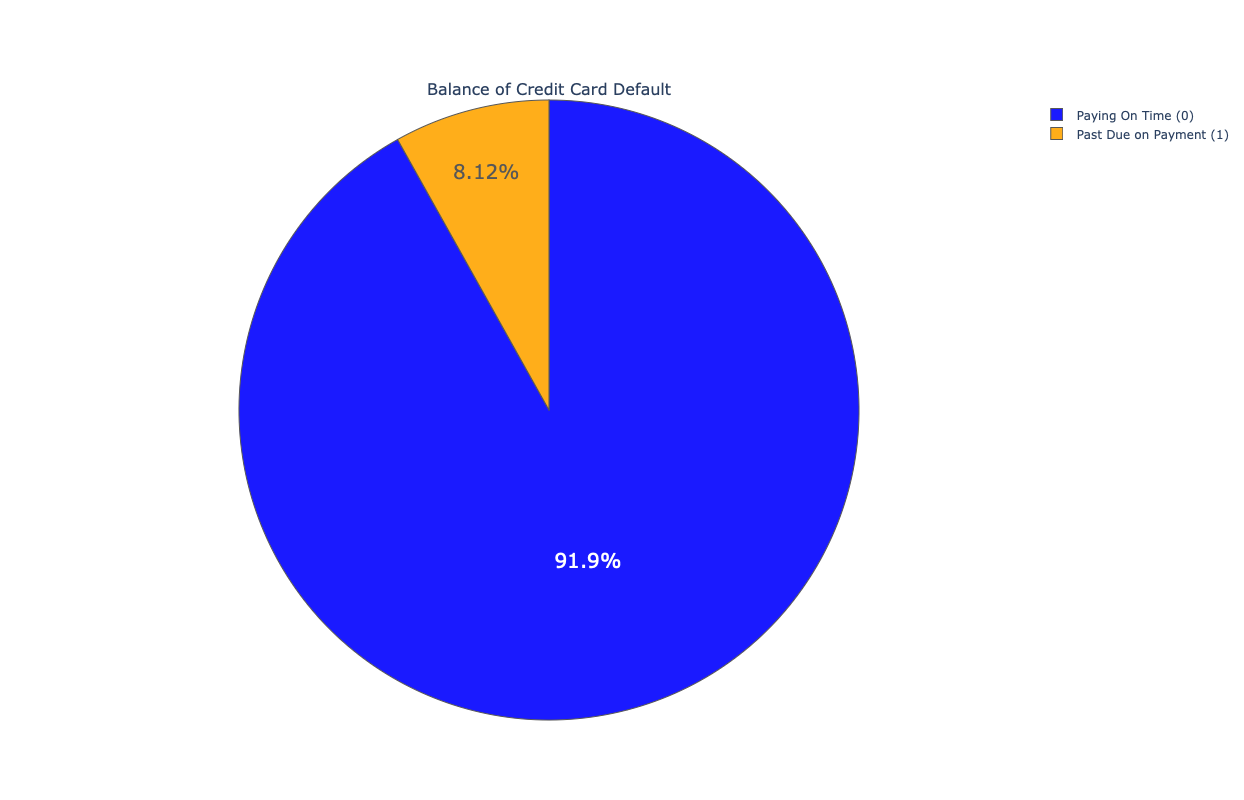

In [5]:
import matplotlib
from matplotlib import pylab as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly.io as pio
from plotly.subplots import make_subplots

labels = ['Paying On Time (0)', 'Past Due on Payment (1)']
values = df['credit_card_default'].value_counts()

trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=20), opacity=0.9,
               marker=dict(colors=['blue', 'orange'], line=dict(width=1)))

layout = dict(title='Balance of Credit Card Default')
fig = dict(data=[trace], layout=layout)

fig = make_subplots(rows=1, cols=1, subplot_titles=('Balance of Credit Card Default',))
fig.add_trace(trace)
#dpi=350
fig.update_layout(width=800, height=800)
fig.show()
fig.write_image('credit_card_default_pie_plot.png')

# 2.EDA_features

In [6]:
print(df['occupation_type'].value_counts())

Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64


In [7]:
print(df['gender'].value_counts())

F      29957
M      15570
XNA        1
Name: gender, dtype: int64


In [8]:
print(df['owns_car'].value_counts())

N    29743
Y    15238
Name: owns_car, dtype: int64


In [9]:
print(df['owns_house'].value_counts())

Y    31642
N    13886
Name: owns_house, dtype: int64


In [10]:
print(df['migrant_worker'].value_counts())

0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64


In [11]:
print(df['no_of_children'].value_counts())

0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
8.0        1
9.0        1
Name: no_of_children, dtype: int64


In [12]:
print(df['total_family_members'].value_counts())

2.0     23455
1.0      9913
3.0      7812
4.0      3623
5.0       564
6.0        57
7.0        12
8.0         6
10.0        2
9.0         1
Name: total_family_members, dtype: int64


In [13]:
df.describe()

age  no_of_children  net_yearly_income  no_of_days_employed  \
count  45528.000000    44754.000000       4.552800e+04         45065.000000   
mean      38.993411        0.420655       2.006556e+05         67609.289293   
std        9.543990        0.724097       6.690740e+05        139323.524434   
min       23.000000        0.000000       2.717061e+04             2.000000   
25%       31.000000        0.000000       1.263458e+05           936.000000   
50%       39.000000        0.000000       1.717149e+05          2224.000000   
75%       47.000000        1.000000       2.406038e+05          5817.000000   
max       55.000000        9.000000       1.407590e+08        365252.000000   

       total_family_members  migrant_worker  yearly_debt_payments  \
count          45445.000000    45441.000000          45433.000000   
mean               2.158081        0.179111          31796.965311   
std                0.911572        0.383450          17269.727234   
min                1.000000        0.000000           2237.470000   
25%                2.000000        0.000000          19231.140000   
50%                2.000000        0.000000          29081.650000   
75%                3.000000        0.000000          40561.150000   
max               10.000000        1.000000         328112.860000   

       credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
count  4.552800e+04           45528.00000  45520.000000   45528.000000   
mean   4.354842e+04              52.23502    782.791257       0.060710   
std    1.487847e+05              29.37691    100.619746       0.264629   
min    4.003140e+03               0.00000    500.000000       0.000000   
25%    2.397381e+04              27.00000    704.000000       0.000000   
50%    3.568804e+04              54.00000    786.000000       0.000000   
75%    5.343576e+04              78.00000    867.000000       0.000000   
max    3.112997e+07              99.00000    949.000000       2.000000   

       default_in_last_6months  credit_card_default  
count             45528.000000         45528.000000  
mean                  0.050540             0.081203  
std                   0.219059             0.273149  
min                   0.000000             0.000000  
25%                   0.000000             0.000000  
50%                   0.000000             0.000000  
75%                   0.000000             0.000000  
max                   1.000000             1.000000

# 2.EDA_correlation_categorical vs continuous

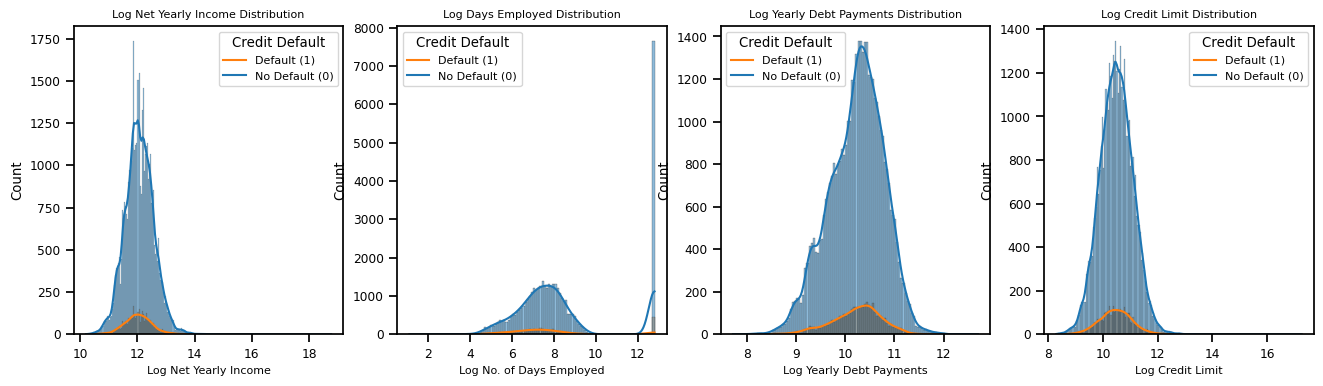

<Figure size 2240x1680 with 0 Axes>

In [14]:
import seaborn as sns

sns.set_context("notebook", font_scale=0.8)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))  # Update nrows and ncols

# Set DPI to 350
plt.figure(dpi=350)

df['log_net_yearly_income'] = np.log1p(df['net_yearly_income'])
df['log_no_of_days_employed'] = np.log1p(df['no_of_days_employed'])
df['log_yearly_debt_payments'] = np.log1p(df['yearly_debt_payments'])
df['log_credit_limit'] = np.log1p(df['credit_limit'])

sns.histplot(data=df, x="log_net_yearly_income", hue="credit_card_default", kde=True, ax=axes[0])
sns.histplot(data=df, x="log_no_of_days_employed", hue="credit_card_default", kde=True, ax=axes[1])
sns.histplot(data=df, x="log_yearly_debt_payments", hue="credit_card_default", kde=True, ax=axes[2])
sns.histplot(data=df, x="log_credit_limit", hue="credit_card_default", kde=True, ax=axes[3])

axes[0].set_xlabel("Log Net Yearly Income", fontsize=8)
axes[1].set_xlabel("Log No. of Days Employed", fontsize=8)
axes[2].set_xlabel("Log Yearly Debt Payments", fontsize=8)
axes[3].set_xlabel("Log Credit Limit", fontsize=8)

for ax in axes:
    ax.legend(title="Credit Default", labels=["Default (1)", "No Default (0)"], fontsize=8)

axes[0].set_title("Log Net Yearly Income Distribution", fontsize=8)
axes[1].set_title("Log Days Employed Distribution", fontsize=8)
axes[2].set_title("Log Yearly Debt Payments Distribution", fontsize=8)
axes[3].set_title("Log Credit Limit Distribution", fontsize=8)

plt.tight_layout()

plt.savefig('histogram_distribution_with_log.png')

plt.show()

<Figure size 2240x1680 with 0 Axes>

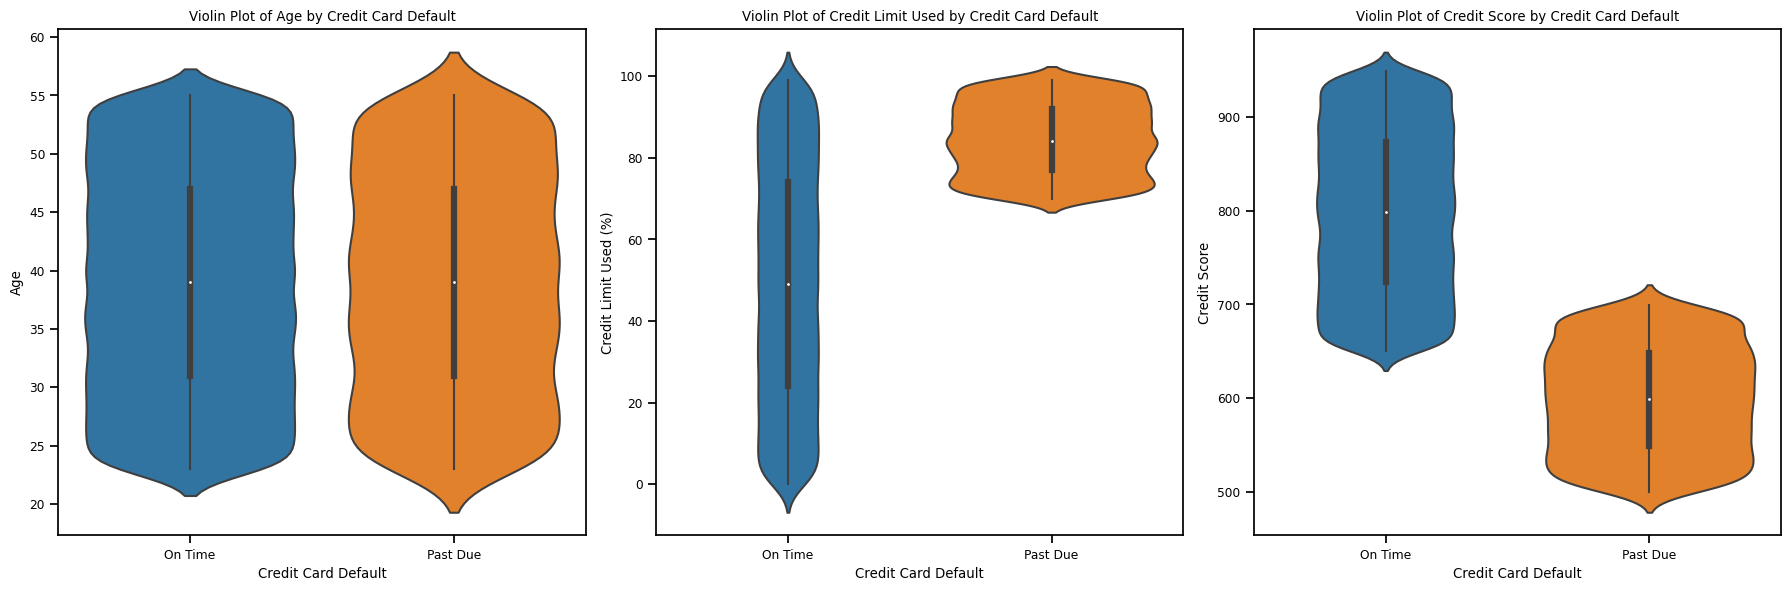

In [15]:
plt.figure(dpi=350)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.violinplot(x="credit_card_default", y="age", data=df, ax=axes[0])
sns.violinplot(x="credit_card_default", y="credit_limit_used(%)", data=df, ax=axes[1])
sns.violinplot(x="credit_card_default", y="credit_score", data=df, ax=axes[2])

axes[0].set_xlabel("Credit Card Default")
axes[0].set_ylabel("Age")
axes[0].set_title("Violin Plot of Age by Credit Card Default")
axes[0].set_xticklabels(['On Time', 'Past Due'])  # Add labels to x-axis ticks

axes[1].set_xlabel("Credit Card Default")
axes[1].set_ylabel("Credit Limit Used (%)")
axes[1].set_title("Violin Plot of Credit Limit Used by Credit Card Default")
axes[1].set_xticklabels(['On Time', 'Past Due'])  # Add labels to x-axis ticks

axes[2].set_xlabel("Credit Card Default")
axes[2].set_ylabel("Credit Score")
axes[2].set_title("Violin Plot of Credit Score by Credit Card Default")
axes[2].set_xticklabels(['On Time', 'Past Due'])  # Add labels to x-axis ticks

plt.tight_layout()
plt.savefig('violin_plots.png')
plt.show()

# 2.EDA_correlation_continuous vs continuous

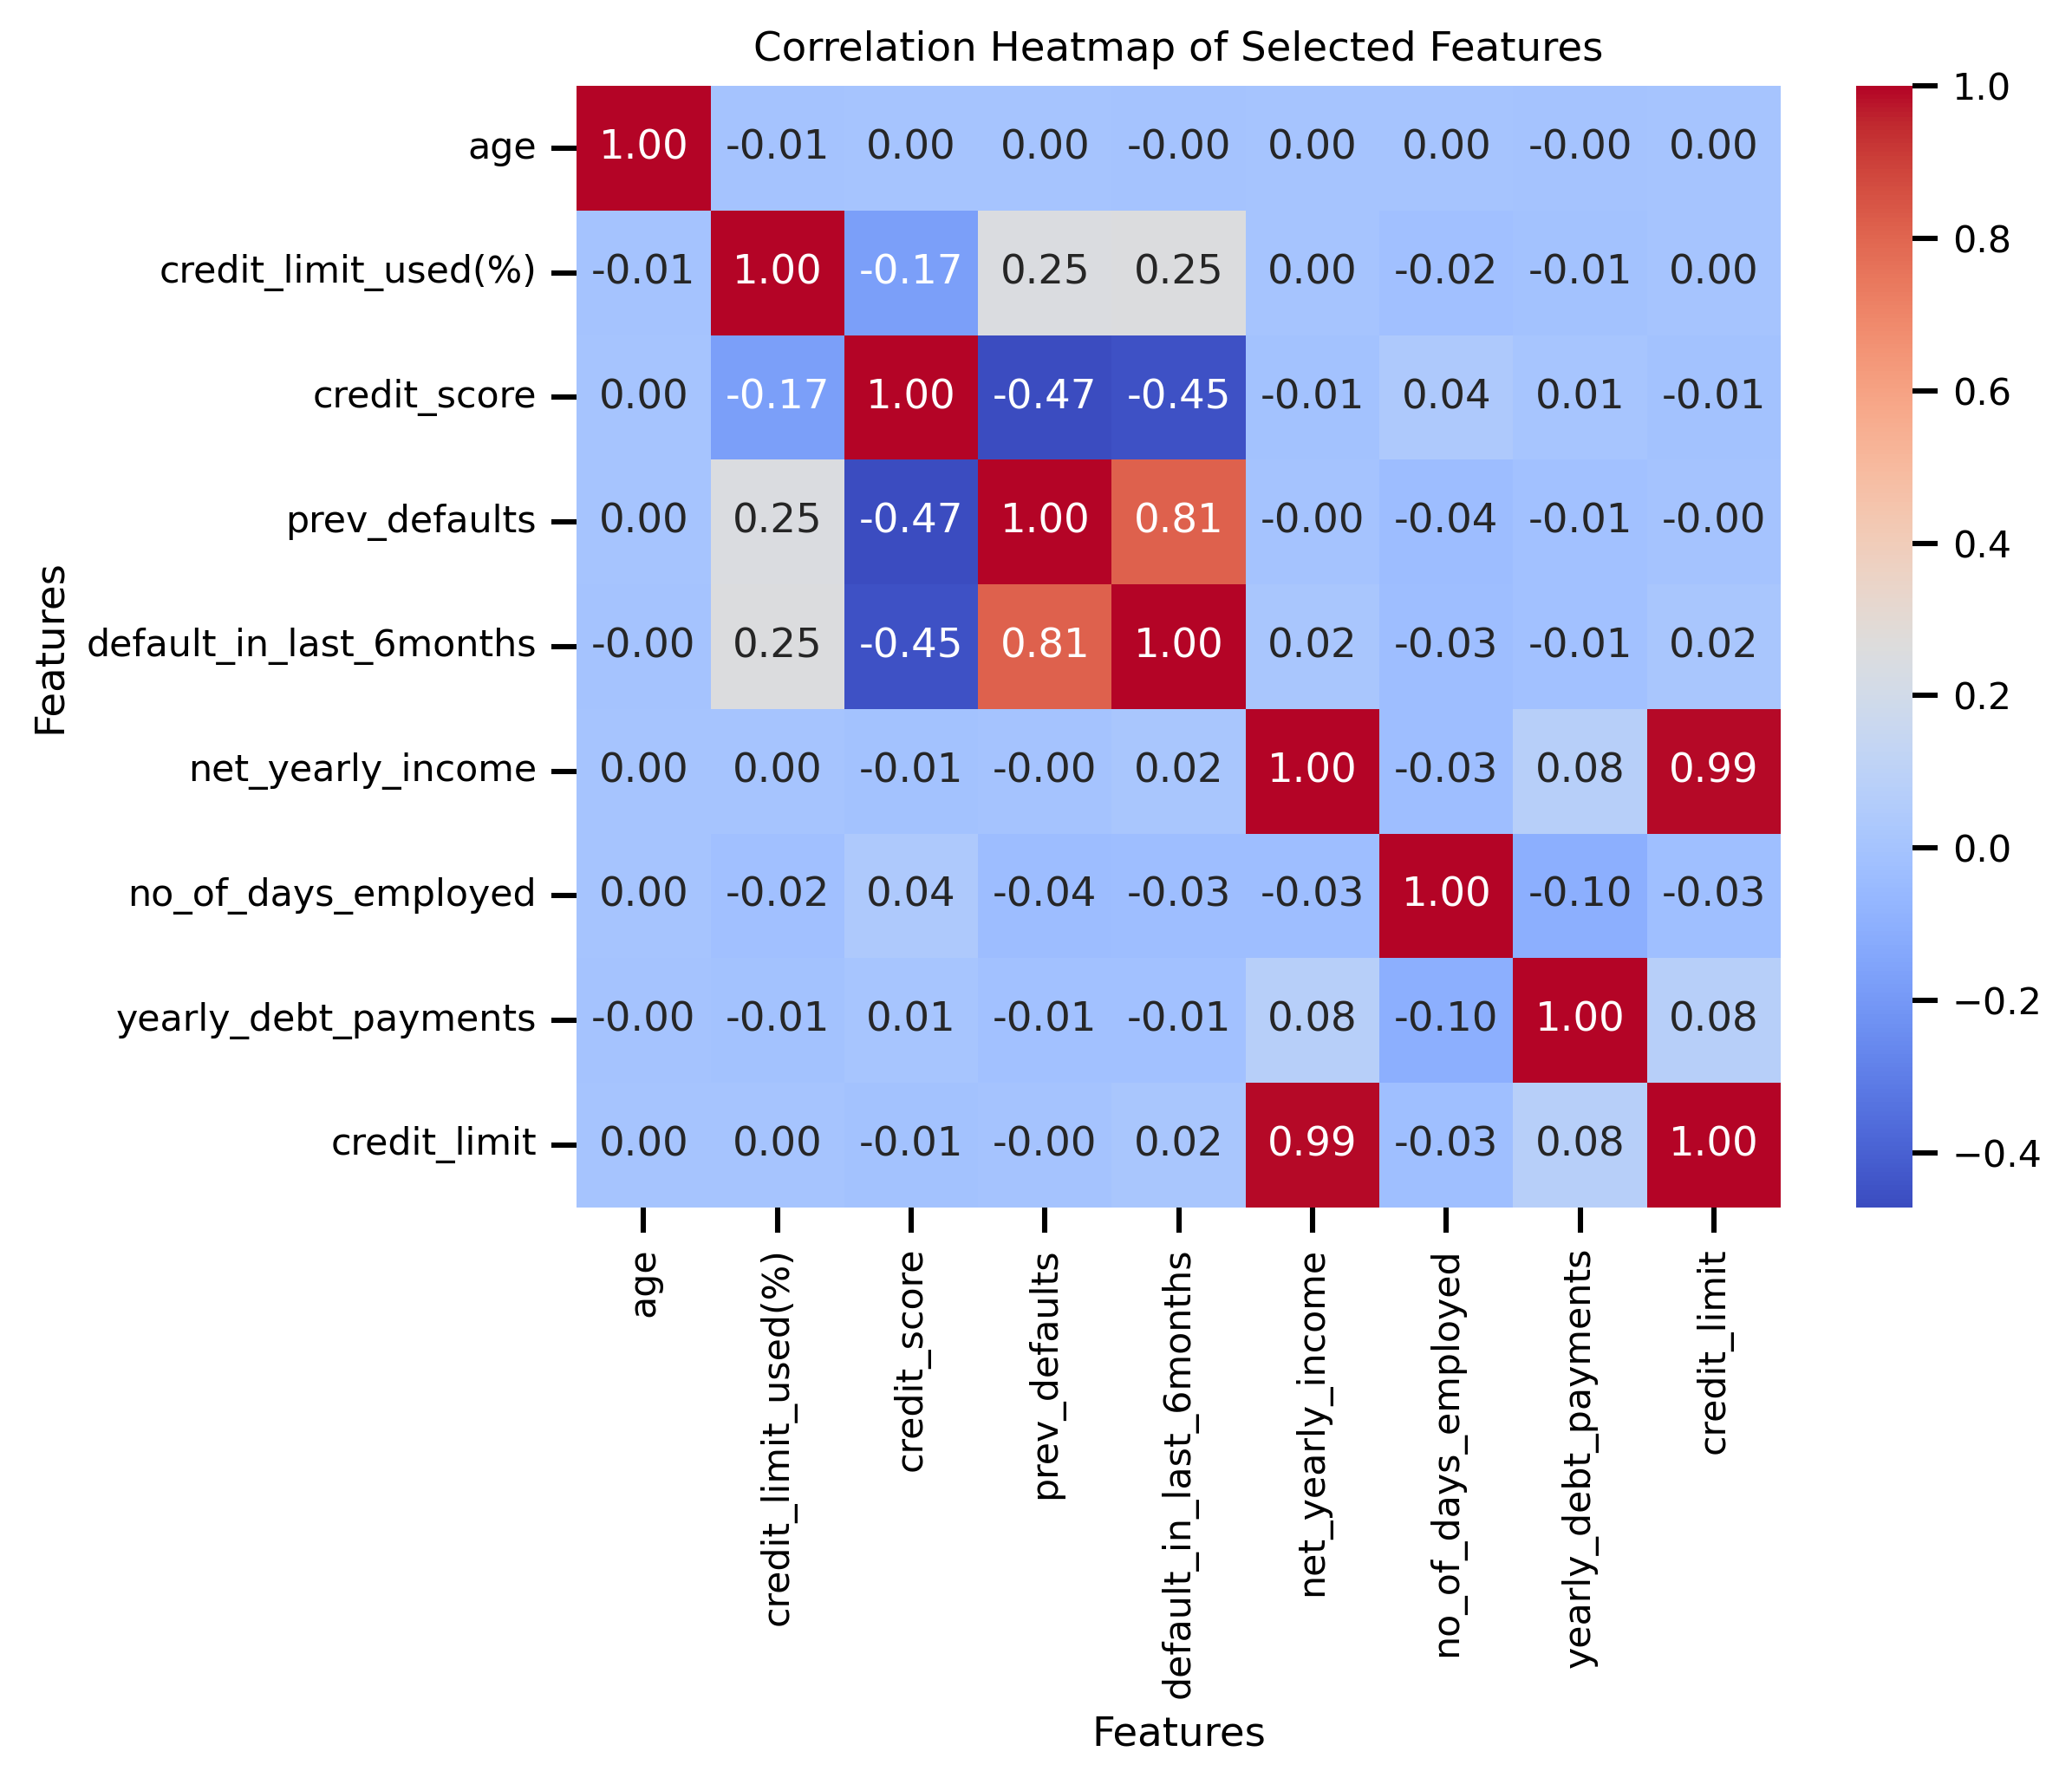

In [16]:
selected_features = [
    'age', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
    'default_in_last_6months', 'net_yearly_income', 'no_of_days_employed',
    'yearly_debt_payments', 'credit_limit'
]

# Create a correlation matrix for the selected features
correlation_matrix = df[selected_features].corr()

# Set DPI to 350
plt.figure(dpi=350)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels, title, and stick names
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap of Selected Features")

# Save the figure
plt.savefig('heatmap.png')

# Show the plot
plt.show()

# 2.EDA_correlation_categorical vs categorical

<Figure size 2240x1680 with 0 Axes>

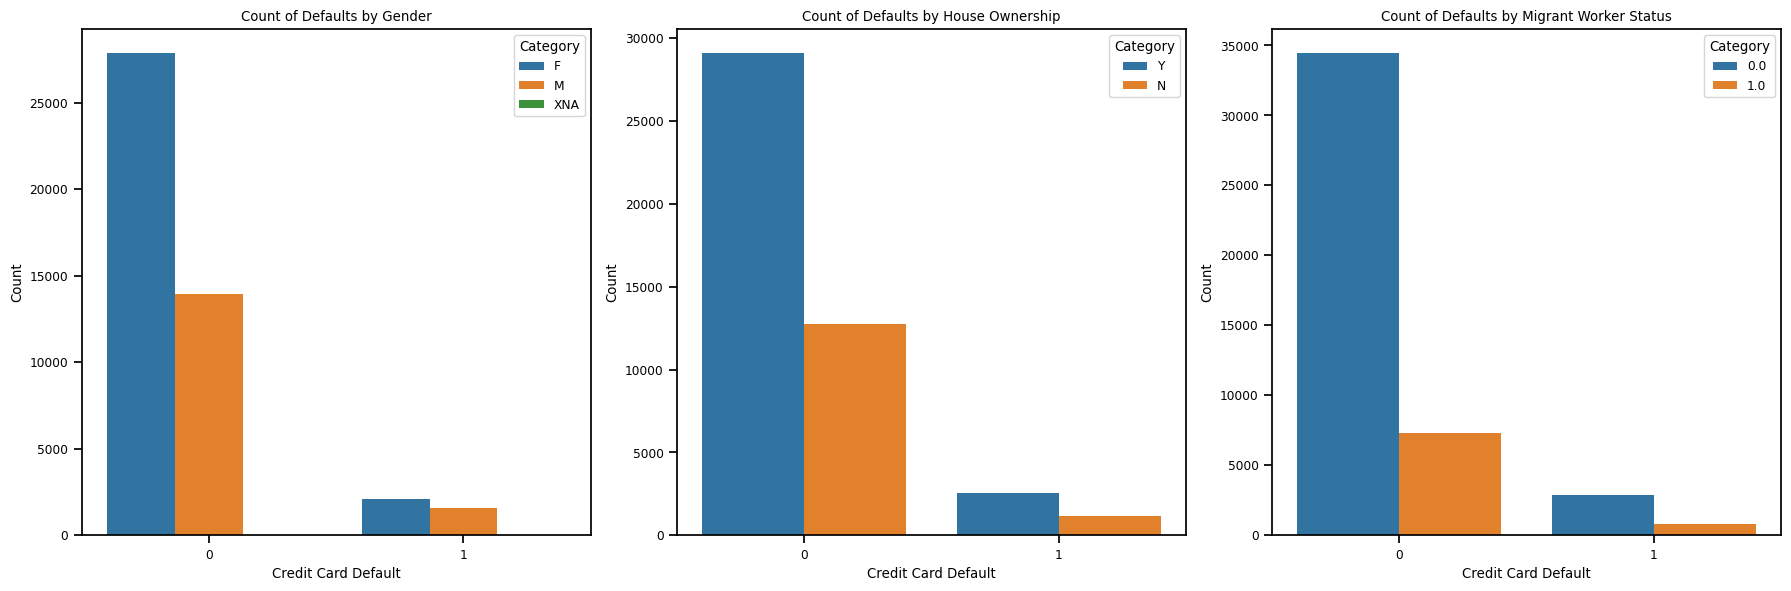

In [17]:
plt.figure(dpi=350)

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot countplots for the target variable and categorical features
sns.countplot(x="credit_card_default", hue="gender", data=df, ax=axes[0])
sns.countplot(x="credit_card_default", hue="owns_house", data=df, ax=axes[1])
sns.countplot(x="credit_card_default", hue="migrant_worker", data=df, ax=axes[2])

# Add labels, titles, and axis names
axes[0].set_xlabel("Credit Card Default")
axes[0].set_ylabel("Count")
axes[0].set_title("Count of Defaults by Gender")

axes[1].set_xlabel("Credit Card Default")
axes[1].set_ylabel("Count")
axes[1].set_title("Count of Defaults by House Ownership")

axes[2].set_xlabel("Credit Card Default")
axes[2].set_ylabel("Count")
axes[2].set_title("Count of Defaults by Migrant Worker Status")

# Add legend
for ax in axes:
    ax.legend(title="Category", loc="upper right")

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('countplots.png')

# Show the plot
plt.show()

# 3.Methods_Handle Missing Value

In [18]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr >0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (45528, 23)
fraction of missing values in features:
owns_car                    0.012015
no_of_children              0.017001
no_of_days_employed         0.010170
total_family_members        0.001823
migrant_worker              0.001911
yearly_debt_payments        0.002087
credit_score                0.000176
log_no_of_days_employed     0.010170
log_yearly_debt_payments    0.002087
dtype: float64
data types of the features with missing values:
owns_car                     object
no_of_children              float64
no_of_days_employed         float64
total_family_members        float64
migrant_worker              float64
yearly_debt_payments        float64
credit_score                float64
log_no_of_days_employed     float64
log_yearly_debt_payments    float64
dtype: object
fraction of points with missing values: 0.04434633632050606


In [19]:
y = df['credit_card_default']
customer_id = df['customer_id']
name = df['name']
# drop ID,name, and 4 features which are produced by log-transformation in EDA
X = df.drop(columns=['credit_card_default','customer_id','name','log_net_yearly_income','log_no_of_days_employed','log_yearly_debt_payments','log_credit_limit'])
classes, counts = np.unique(y,return_counts=True)
print(classes, counts)
print('balance:',np.max(counts/len(y)))

[0 1] [41831  3697]
balance: 0.9187972236865226


In [20]:
#check whether dropped or not
X.describe()

age  no_of_children  net_yearly_income  no_of_days_employed  \
count  45528.000000    44754.000000       4.552800e+04         45065.000000   
mean      38.993411        0.420655       2.006556e+05         67609.289293   
std        9.543990        0.724097       6.690740e+05        139323.524434   
min       23.000000        0.000000       2.717061e+04             2.000000   
25%       31.000000        0.000000       1.263458e+05           936.000000   
50%       39.000000        0.000000       1.717149e+05          2224.000000   
75%       47.000000        1.000000       2.406038e+05          5817.000000   
max       55.000000        9.000000       1.407590e+08        365252.000000   

       total_family_members  migrant_worker  yearly_debt_payments  \
count          45445.000000    45441.000000          45433.000000   
mean               2.158081        0.179111          31796.965311   
std                0.911572        0.383450          17269.727234   
min                1.000000        0.000000           2237.470000   
25%                2.000000        0.000000          19231.140000   
50%                2.000000        0.000000          29081.650000   
75%                3.000000        0.000000          40561.150000   
max               10.000000        1.000000         328112.860000   

       credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
count  4.552800e+04           45528.00000  45520.000000   45528.000000   
mean   4.354842e+04              52.23502    782.791257       0.060710   
std    1.487847e+05              29.37691    100.619746       0.264629   
min    4.003140e+03               0.00000    500.000000       0.000000   
25%    2.397381e+04              27.00000    704.000000       0.000000   
50%    3.568804e+04              54.00000    786.000000       0.000000   
75%    5.343576e+04              78.00000    867.000000       0.000000   
max    3.112997e+07              99.00000    949.000000       2.000000   

       default_in_last_6months  
count             45528.000000  
mean                  0.050540  
std                   0.219059  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   0.000000  
max                   1.000000

In [21]:
from sklearn.impute import SimpleImputer

# Extract continuous features
continuous_features = ['credit_score','no_of_days_employed','yearly_debt_payments']

# Separate continuous features for imputation
X_continuous = X[continuous_features]

# Use SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_continuous_imputed = pd.DataFrame(imputer.fit_transform(X_continuous), columns=continuous_features)

# Replace the original continuous features with the imputed values
X[continuous_features] = X_continuous_imputed

In [22]:
#check whether imputed or not
print('data dimensions:',X.shape)
perc_missing_per_ftr = X.isnull().sum(axis=0)/X.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr >0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(X.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (45528, 16)
fraction of missing values in features:
owns_car                0.012015
no_of_children          0.017001
total_family_members    0.001823
migrant_worker          0.001911
dtype: float64
data types of the features with missing values:
owns_car                 object
no_of_children          float64
total_family_members    float64
migrant_worker          float64
dtype: object
fraction of points with missing values: 0.03237568089966614


# 3.Methods_Write a Function

In [23]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score


def MLpipe(X, y, preprocessor, ML_algo, param_grid):
    # lists to be returned 
    scores = []
    best_models = []
    test_sets = []
    
    # loop through 10 different random states
    random.seed(42)
    random_state = random.sample(range(1, 101), 10)

    for i, rs in enumerate(random_state):
        
        # split the data to other and test (80-20)
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=rs, stratify=y)

        # print sets before preprocess
        print(f'\nSearch{i+1}, random_state = {rs}')
        print("X_other Shape before preprocessing:", X_other.shape)
        print("X_test Shape before preprocessing:", X_test.shape)

        # use StratifiedKFold with 4 folds
        kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=rs)
        pipe = make_pipeline(preprocessor, ML_algo)
        fbeta_scorer = make_scorer(fbeta_score, beta=0.5)
        grid = GridSearchCV(pipe, 
                            param_grid=param_grid, 
                            scoring=fbeta_scorer,  # use F-beta score
                            cv=kf, 
                            return_train_score=True,
                            n_jobs=-1,
                            verbose=True)
        
        # print sets after preprocess
        X_other_preprocessed = preprocessor.fit_transform(X_other)
        X_test_preprocessed = preprocessor.transform(X_test)
        print("X_other Shape after preprocessing:", X_other_preprocessed.shape)
        print("X_test Shape after preprocessing:", X_test_preprocessed.shape)

        # fit a model using GridSearchCV with StratifiedKFold and the predefined Preprocessor
        grid.fit(X_other, y_other)

        # print the GridSearchCV results
        print("GridSearchCV Results:")
        print('Best Parameters:', grid.best_params_)
        print('Best Score:', grid.best_score_)

        # return a list of 10 best models
        best_model = grid.best_estimator_
        best_models.append(best_model)

        # calculate and print test scores
        # return a list of 10 test scores
        y_test_prob = best_model.predict_proba(X_test)[:, 1]  # the second column is the positive class (credit_card_default=1)
        test_fbeta = fbeta_score(y_test, best_model.predict(X_test), beta=0.5)
        print("Test Score (F-beta):", test_fbeta)
        scores.append(test_fbeta)
        test_sets.append([X_test, y_test])
        
    return scores, best_models, test_sets

# 3.Methods_Logistic Regression

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression

#preprocessor
#ordinal_ftrs = [] 
#ordinal_cats = []
onehot_ftrs = ['gender', 'owns_car', 'owns_house', 'no_of_children', 'occupation_type', 'total_family_members', 'migrant_worker']
minmax_ftrs = ['age', 'credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months']
std_ftrs = ['net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)
#algorithms and parameters
ML_algo = LogisticRegression()
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10],   
    'logisticregression__max_iter': [1000, 2000, 3000],  # Add one more parameter
}

#use function
scores, best_models, test_sets = MLpipe(X, y, preprocessor, ML_algo, param_grid)
mean_scores = np.mean(scores)
std_score = np.std(scores)
print(f'Mean of Test Scores = {mean_scores}, Standard Deviation of Test Scores = {std_score}')

# Save result and best model
scores_table1 = {}
scores_table1['Model'] = 'Logistic Regression'
scores_table1['Mean of Test Score'] = mean_scores
scores_table1['Standard Deviation of Test Score'] = std_score
scores_table1['Coefficient of Variation'] = np.array(std_score) / np.array(mean_scores)
scores_table1['Std Above Baseline'] = (np.array(mean_scores) - 0.09754308570704885) / np.array(std_score)

#get best model
best_model_index = np.argmax(scores)
best_model1 = best_models[best_model_index]

#get X and y's test set
test_set1 = test_sets[best_model_index]
X_test1, y_test1 = test_set1


Search1, random_state = 82
X_other Shape before preprocessing: (36422, 16)
X_test Shape before preprocessing: (9106, 16)
X_other Shape after preprocessing: (36422, 60)
X_test Shape after preprocessing: (9106, 60)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
GridSearchCV Results:
Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 1000}
Best Score: 0.9359791572006294
Test Score (F-beta): 0.9472304162569649

Search2, random_state = 15
X_other Shape before preprocessing: (36422, 16)
X_test Shape before preprocessing: (9106, 16)
X_other Shape after preprocessing: (36422, 61)
X_test Shape after preprocessing: (9106, 61)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
GridSearchCV Results:
Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 1000}
Best Score: 0.9365661326228111
Test Score (F-beta): 0.9423909423909425

Search3, random_state = 4
X_other Shape before preprocessing: (36422, 16)
X_test Shape befo

# 3.Methods_Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

#preprocessor
onehot_ftrs = ['gender', 'owns_car', 'owns_house', 'no_of_children', 'occupation_type', 'total_family_members', 'migrant_worker']
minmax_ftrs = ['age', 'credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months']
std_ftrs = ['net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# algorithms and parameters
ML_algo = DecisionTreeClassifier()
param_grid = {
    'decisiontreeclassifier__max_depth': [5, 10, 15, None],  
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],  # Add one more parameter
}

# use function
scores, best_models, test_sets = MLpipe(X, y, preprocessor, ML_algo, param_grid)
mean_scores = np.mean(scores)
std_score = np.std(scores)
print(f'Mean of Test Scores = {mean_scores}, Standard Deviation of Test Scores = {std_score}')

# Save result and best model
scores_table2 = {}
scores_table2['Model'] = 'Decision Tree'
scores_table2['Mean of Test Score'] = mean_scores
scores_table2['Standard Deviation of Test Score'] = std_score
scores_table2['Coefficient of Variation'] = np.array(std_score) / np.array(mean_scores)
scores_table2['Std Above Baseline'] = (np.array(mean_scores) - 0.09754308570704885) / np.array(std_score)

#get best model
best_model_index = np.argmax(scores)
best_model2 = best_models[best_model_index]

#get X and y's test set
test_set2 = test_sets[best_model_index]
X_test2, y_test2 = test_set2


Search1, random_state = 82
X_other Shape before preprocessing: (36422, 16)
X_test Shape before preprocessing: (9106, 16)
X_other Shape after preprocessing: (36422, 60)
X_test Shape after preprocessing: (9106, 60)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
GridSearchCV Results:
Best Parameters: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 2}
Best Score: 0.9339490586251618
Test Score (F-beta): 0.9451518119490695

Search2, random_state = 15
X_other Shape before preprocessing: (36422, 16)
X_test Shape before preprocessing: (9106, 16)
X_other Shape after preprocessing: (36422, 61)
X_test Shape after preprocessing: (9106, 61)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
GridSearchCV Results:
Best Parameters: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 2}
Best Score: 0.939327082428482
Test Score (F-beta): 0.9423650215303079

Search3, random_state = 4
X_other Shape before prepr

# 3.Methods_Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

#preprocessor
onehot_ftrs = ['gender', 'owns_car', 'owns_house', 'no_of_children', 'occupation_type', 'total_family_members', 'migrant_worker']
minmax_ftrs = ['age', 'credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months']
std_ftrs = ['net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# algorithms and parameters
ML_algo = RandomForestClassifier(random_state=42)
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 150, 200],  
    'randomforestclassifier__max_depth': [None, 10, 30],  #add one more parameter
}

# use function
scores = MLpipe(X, y, preprocessor, ML_algo, param_grid)[0]
best_model = MLpipe(X, y, preprocessor, ML_algo, param_grid)[1]
test_sets = MLpipe(X, y, preprocessor, ML_algo, param_grid)[2]
mean_scores = np.mean(scores)
std_score = np.std(scores)
print(f'Mean of Test Scores = {mean_scores}, Standard Deviation of Test Scores = {std_score}')

# Save result and best model
scores_table3 = {}
scores_table3['Model'] = 'Random Forest'
scores_table3['Mean of Test Score'] = mean_scores
scores_table3['Standard Deviation of Test Score'] = std_score
scores_table3['Coefficient of Variation'] = np.array(std_score) / np.array(mean_scores)
scores_table3['Std Above Baseline'] = (np.array(mean_scores) - 0.09754308570704885) / np.array(std_score)

#get best model
best_model_index = np.argmax(scores)
best_model3 = best_models[best_model_index]

#get X and y's test set
test_set3 = test_sets[best_model_index]
X_test3, y_test3 = test_set3


Search1, random_state = 82
X_other Shape before preprocessing: (36422, 16)
X_test Shape before preprocessing: (9106, 16)
X_other Shape after preprocessing: (36422, 60)
X_test Shape after preprocessing: (9106, 60)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
GridSearchCV Results:
Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 50}
Best Score: 0.9382335922697143
Test Score (F-beta): 0.9476268412438624

Search2, random_state = 15
X_other Shape before preprocessing: (36422, 16)
X_test Shape before preprocessing: (9106, 16)
X_other Shape after preprocessing: (36422, 61)
X_test Shape after preprocessing: (9106, 61)
Fitting 4 folds for each of 12 candidates, totalling 48 fits
GridSearchCV Results:
Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 50}
Best Score: 0.9393240652836065
Test Score (F-beta): 0.9436152570480928

Search3, random_state = 4
X_other Shape before preprocess

In [27]:
# 4.Methods_XGBoost

In [28]:
y = df['credit_card_default']
customer_id = df['customer_id']
name = df['name']
# drop ID,name, and 4 features which are produced by log-transformation in EDA
X = df.drop(columns=['credit_card_default','customer_id','name','log_net_yearly_income','log_no_of_days_employed','log_yearly_debt_payments','log_credit_limit'])

In [29]:
#check whether retrieve data correctly or not
print('data dimensions:',X.shape)
perc_missing_per_ftr = X.isnull().sum(axis=0)/X.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr >0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(X.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (45528, 16)
fraction of missing values in features:
owns_car                0.012015
no_of_children          0.017001
no_of_days_employed     0.010170
total_family_members    0.001823
migrant_worker          0.001911
yearly_debt_payments    0.002087
credit_score            0.000176
dtype: float64
data types of the features with missing values:
owns_car                 object
no_of_children          float64
no_of_days_employed     float64
total_family_members    float64
migrant_worker          float64
yearly_debt_payments    float64
credit_score            float64
dtype: object
fraction of points with missing values: 0.04434633632050606


In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
import xgboost as xgb

# Define the features and preprocessor
onehot_ftrs = ['gender', 'owns_car', 'owns_house', 'no_of_children', 'occupation_type', 'total_family_members', 'migrant_worker']
minmax_ftrs = ['age', 'credit_limit_used(%)', 'credit_score', 'prev_defaults', 'default_in_last_6months']
std_ftrs = ['net_yearly_income', 'no_of_days_employed', 'yearly_debt_payments', 'credit_limit']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

# Initialize lists for storing test scores and best models
test_scores = []
best_models = []
test_sets = []

# Define the stratified k-fold splitting strategy with 4 folds
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Iterate through 10 different random states
random_state = random.sample(range(1, 101), 10)
for i, rs in enumerate(random_state):
    # Split the data into other and test sets (80-20)
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=rs, stratify=y)

    # Define the XGBoost model with its specific parameters
    xgb_model = xgb.XGBClassifier()

    # Set the parameters for GridSearchCV
    param_grid = {'xgbclassifier__learning_rate': [0.01, 0.1, 0.3, 0.5], 'xgbclassifier__max_depth': [3, 5, 7]}

    # Create the pipeline with preprocessor and XGBoost model
    pipe = make_pipeline(preprocessor, xgb_model)

    # Use GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(pipe, param_grid=param_grid, scoring=make_scorer(fbeta_score, beta=0.5), cv=kf, return_train_score=True, n_jobs=-1, verbose=True)

    # Fit the model
    grid.fit(X_other, y_other)

    # Get the best model
    best_model = grid.best_estimator_
    best_models.append(best_model)

    # Calculate F1 score with a beta of 0.5 for test set
    y_test_prob = best_model.predict_proba(X_test)[:, 1]
    test_fbeta = fbeta_score(y_test, (y_test_prob > 0.5).astype(int), beta=0.5)
    test_scores.append(test_fbeta)
    test_sets.append([X_test, y_test])
    
    # Print the results for each iteration
    print(f'\nSearch{i+1}, random_state = {rs}')
    print("GridSearchCV Results:")
    print('Best Parameters:', grid.best_params_)
    print('Best Score:', grid.best_score_)
    print("Test F1 Score (beta=0.5):", test_fbeta)

# Print the final scores
mean_scores = np.mean(test_scores)
std_score = np.std(test_scores)
print(f'Mean of Test F1 Scores (beta=0.5) = {mean_scores}, Standard Deviation of Test Scores = {std_score}')

# Save result and best model
scores_table4 = {}
scores_table4['Model'] = 'XGBoost'
scores_table4['Mean of Test Score'] = mean_scores
scores_table4['Standard Deviation of Test Score'] = std_score
scores_table4['Coefficient of Variation'] = np.array(std_score) / np.array(mean_scores)
scores_table4['Std Above Baseline'] = (np.array(mean_scores) - 0.09754308570704885) / np.array(std_score)

#get best model
best_model_index = np.argmax(test_scores)
best_model4 = best_models[best_model_index]

#get X and y's test set
test_set4 = test_sets[best_model_index]
X_test4, y_test4 = test_set4

Fitting 4 folds for each of 12 candidates, totalling 48 fits

Search1, random_state = 95
GridSearchCV Results:
Best Parameters: {'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 3}
Best Score: 0.9400264939111435
Test F1 Score (beta=0.5): 0.9403285283271875
Fitting 4 folds for each of 12 candidates, totalling 48 fits

Search2, random_state = 70
GridSearchCV Results:
Best Parameters: {'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 3}
Best Score: 0.940210795734641
Test F1 Score (beta=0.5): 0.9394957983193276
Fitting 4 folds for each of 12 candidates, totalling 48 fits

Search3, random_state = 12
GridSearchCV Results:
Best Parameters: {'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 3}
Best Score: 0.9409700313548903
Test F1 Score (beta=0.5): 0.9365456396335256
Fitting 4 folds for each of 12 candidates, totalling 48 fits

Search4, random_state = 76
GridSearchCV Results:
Best Parameters: {'xgbclassifier__learning_rate': 0.01, 'xgbclassifi

# 4.Results_Baseline_Test Score_Best Model

In [32]:
# In the baseline model, it predicts all points as class 1
TP = 3697
FP = 41831
FN = 3697

# Calculate Precision (P)
P = TP / (TP + FP)

# Calculate Recall (R)
R = TP / (TP + FN)

# Calculate F0.5 Score
F0_5 = (1.25 * P * R) / (0.25 * P + R)

# Print F0.5 Score
print("F0.5 Score:", F0_5)

F0.5 Score: 0.09754308570704885


In [33]:
scores_table = pd.DataFrame([scores_table1, scores_table2, scores_table3, scores_table4])

# Print out the whole DataFrame
print(scores_table)

# Save the DataFrame to the desktop
desktop_path = "/Users/emmasun/Desktop/final/results" 
scores_table.to_csv(f"{desktop_path}/test scores and best model.csv", index=False)

                 Model  Mean of Test Score  Standard Deviation of Test Score  \
0  Logistic Regression            0.940336                          0.003163   
1        Decision Tree            0.940080                          0.003013   
2        Random Forest            0.940456                          0.003711   
3              XGBoost            0.938968                          0.002861   

   Coefficient of Variation  Std Above Baseline  
0                  0.003363          266.482289  
1                  0.003205          279.637737  
2                  0.003946          227.122777  
3                  0.003047          294.094981  


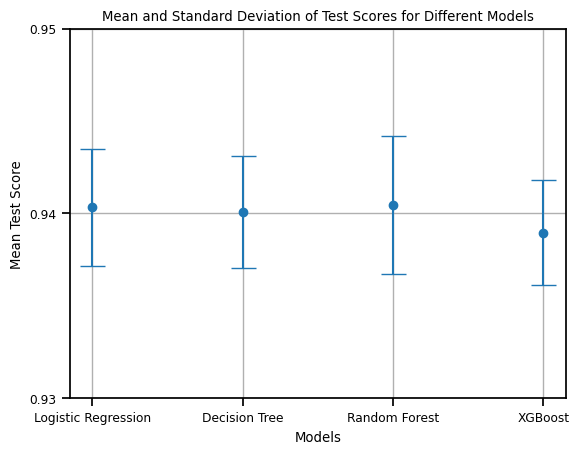

<Figure size 640x480 with 0 Axes>

In [34]:
import os
dpi = 350

# Set grid
plt.grid(True)

model_names = scores_table['Model'].values
model_mean = scores_table['Mean of Test Score'].values
model_std = scores_table['Standard Deviation of Test Score'].values

# Display the mean test scores with error bars
plt.errorbar(model_names, model_mean, yerr=model_std, fmt='o', capsize=9)

plt.title('Mean and Standard Deviation of Test Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Test Score')

# Adjust the y-axis ticks for better visibility
plt.yticks([0.93, 0.94, 0.95])

# Show the plot
plt.show()

# Save the plot on the desktop
desktop_path = "/Users/emmasun/Desktop/final/figures"
plt.savefig(os.path.join(desktop_path, "test_scores_plot.png"), dpi=dpi)

# 4.Results_Predict Y

In [35]:
y = df['credit_card_default']
customer_id = df['customer_id']
name = df['name']

# Drop ID, name, and 4 features which are produced by log-transformation in EDA
X = df.drop(columns=['credit_card_default', 'customer_id', 'name', 'log_net_yearly_income', 'log_no_of_days_employed', 'log_yearly_debt_payments', 'log_credit_limit'])

# Extract continuous features
continuous_features = ['credit_score','no_of_days_employed','yearly_debt_payments']

# Separate continuous features for imputation
X_continuous = X[continuous_features]

# Use SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_continuous_imputed = pd.DataFrame(imputer.fit_transform(X_continuous), columns=continuous_features)

# Replace the original continuous features with the imputed values
X[continuous_features] = X_continuous_imputed

# Prediction using the best_model4
prediction_y = best_model2.predict(X)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'True_y': y,
    'Prediction_y': prediction_y
})

# Save the DataFrame to a CSV file
results_df.to_csv('dataset_with_predictions.csv', index=False)

# 4.Results_Confusion Matrix

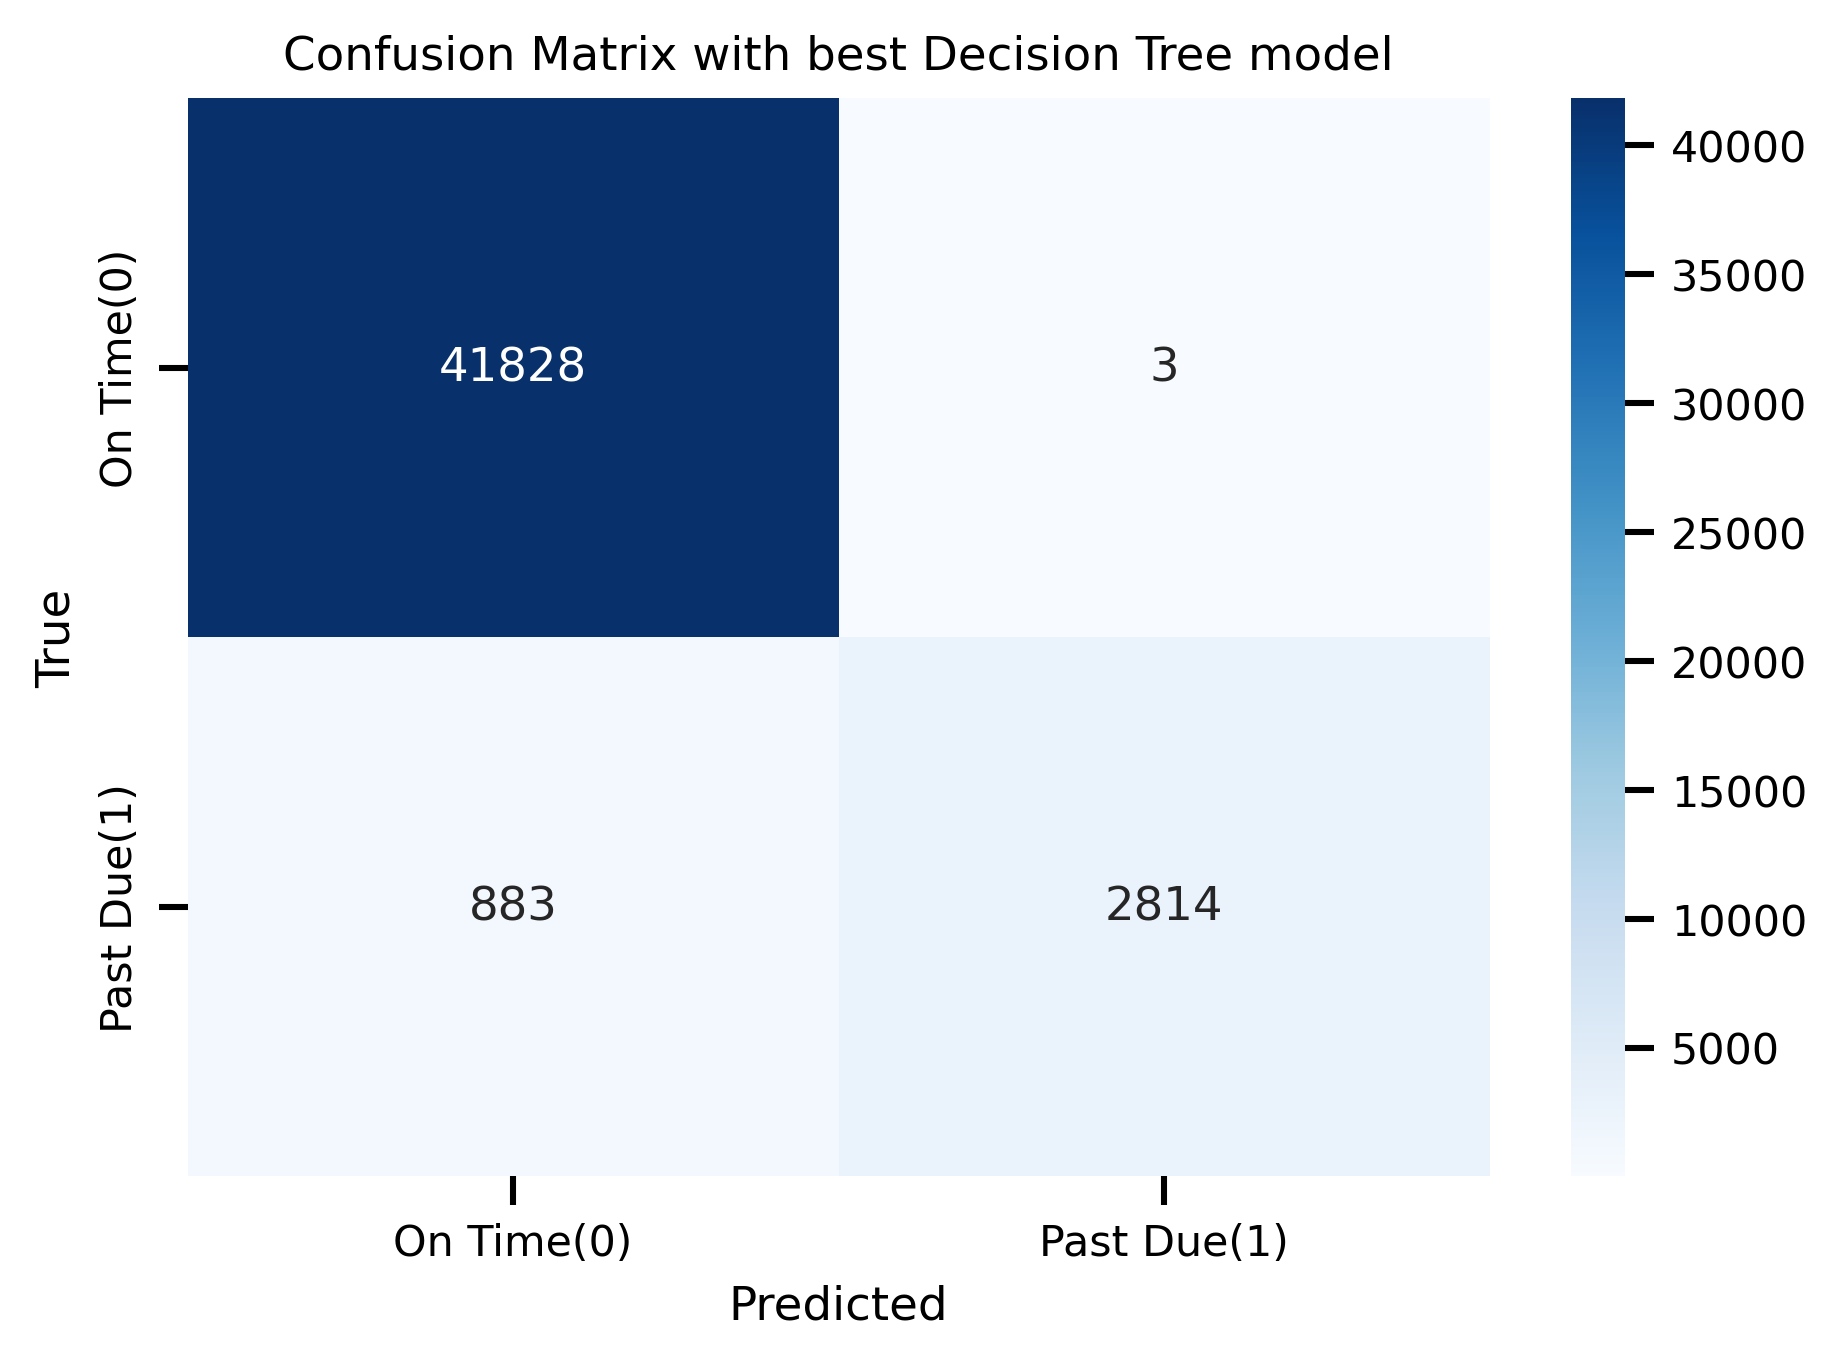

True Negatives (TN): 41828
True Positives (TP): 2814
False Negatives (FN): 883
False Positives (FP): 3


0.9401937854994987

<Figure size 640x480 with 0 Axes>

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y, prediction_y)
colors = ['orange', 'blue']
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(6, 4), dpi=dpi)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time(0)', 'Past Due(1)'], yticklabels=['On Time(0)', 'Past Due(1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with best Decision Tree model')
plt.show()

file_path = '/Users/emmasun/Desktop/final/figures/'
# Set DPI
dpi = 350
plt.savefig(file_path + 'confusion_matrix.png')

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Print the results
print(f'True Negatives (TN): {tn}')
print(f'True Positives (TP): {tp}')
print(f'False Negatives (FN): {fn}')
print(f'False Positives (FP): {fp}')

# Calculate Precision and Recall
precision = tp / (tp + fp)
recall = tp / (tp + fn)

# Calculate F-beta score
beta = 1.25
f_beta = (1.25 * precision * recall) / (0.25 * precision + recall)

f_beta

# 4.Results_Global_Permutation Importance

In [37]:
print(X_test2.shape)
print(y_test2.shape)
print(X_test2.head())

(9106, 16)
(9106,)
       age gender owns_car owns_house  no_of_children  net_yearly_income  \
37626   54      F        Y          Y             0.0          178103.36   
32631   33      F        N          N             0.0          124731.83   
7323    40      F        Y          N             0.0          110770.06   
28010   54      F        N          Y             NaN          167024.03   
16021   48      F        N          Y             0.0          244831.06   

       no_of_days_employed occupation_type  total_family_members  \
37626             365241.0         Unknown                   2.0   
32631             365250.0         Unknown                   1.0   
7323                3464.0         Unknown                   2.0   
28010               1594.0         Unknown                   1.0   
16021                593.0      Core staff                   2.0   

       migrant_worker  yearly_debt_payments  credit_limit  \
37626             0.0              29076.45      23841

In [38]:
# Extract continuous features
continuous_features = ['credit_score','no_of_days_employed','yearly_debt_payments']

# Separate continuous features for imputation
X_continuous = X_test2[continuous_features]

# Use SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_continuous_imputed = pd.DataFrame(imputer.fit_transform(X_continuous), columns=continuous_features)

# Replace the original continuous features with the imputed values
X_test2[continuous_features] = X_continuous_imputed

In [39]:
X_test2_proprocessed = best_model2.steps[0][1].transform(X_test2)

In [40]:
X_test2_proprocessed = pd.DataFrame(data=X_test2_proprocessed, columns = best_model2[0].get_feature_names_out())

In [41]:
X_test2_proprocessed

onehot__gender_F  onehot__gender_M  onehot__owns_car_N  \
0                  1.0               0.0                 0.0   
1                  1.0               0.0                 1.0   
2                  1.0               0.0                 0.0   
3                  1.0               0.0                 1.0   
4                  1.0               0.0                 1.0   
...                ...               ...                 ...   
9101               0.0               1.0                 0.0   
9102               1.0               0.0                 0.0   
9103               1.0               0.0                 1.0   
9104               1.0               0.0                 1.0   
9105               0.0               1.0                 0.0   

      onehot__owns_car_Y  onehot__owns_car_nan  onehot__owns_house_N  \
0                    1.0                   0.0                   0.0   
1                    0.0                   0.0                   1.0   
2                    1.0                   0.0                   1.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   
...                  ...                   ...                   ...   
9101                 1.0                   0.0                   0.0   
9102                 1.0                   0.0                   1.0   
9103                 0.0                   0.0                   0.0   
9104                 0.0                   0.0                   1.0   
9105                 1.0                   0.0                   0.0   

      onehot__owns_house_Y  onehot__no_of_children_0.0  \
0                      1.0                         1.0   
1                      0.0                         1.0   
2                      0.0                         1.0   
3                      1.0                         0.0   
4                      1.0                         1.0   
...                    ...                         ...   
9101                   1.0                         0.0   
9102                   0.0                         0.0   
9103                   1.0                         1.0   
9104                   0.0                         1.0   
9105                   1.0                         1.0   

      onehot__no_of_children_1.0  onehot__no_of_children_2.0  ...  \
0                            0.0                         0.0  ...   
1                            0.0                         0.0  ...   
2                            0.0                         0.0  ...   
3                            0.0                         0.0  ...   
4                            0.0                         0.0  ...   
...                          ...                         ...  ...   
9101                         1.0                         0.0  ...   
9102                         0.0                         1.0  ...   
9103                         0.0                         0.0  ...   
9104                         0.0                         0.0  ...   
9105                         0.0                         0.0  ...   

      onehot__migrant_worker_nan  minmax__age  minmax__credit_limit_used(%)  \
0                            0.0      0.96875                      0.959596   
1                            0.0      0.31250                      0.747475   
2                            0.0      0.53125                      0.292929   
3                            0.0      0.96875                      0.555556   
4                            0.0      0.78125                      0.474747   
...                          ...          ...                           ...   
9101                         0.0      0.81250                      0.565657   
9102                         0.0      0.03125                      0.929293   
9103                         0.0      0.93750                      0.494949   
9104                         0.0      0.00000           

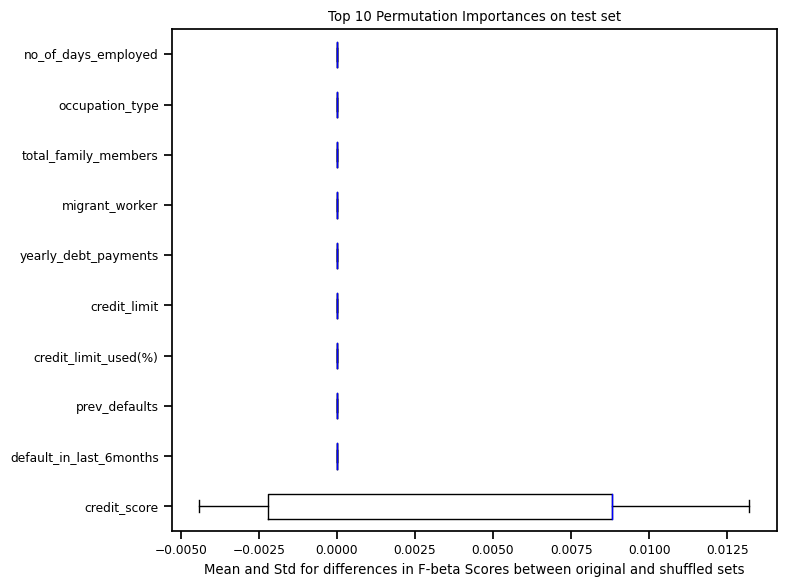

<Figure size 640x480 with 0 Axes>

In [42]:
from sklearn.inspection import permutation_importance

feature_names = X_test2.columns
np.random.seed(100)
nr_runs = 10
scores = np.zeros([len(feature_names), nr_runs])

for i in range(len(feature_names)):
    fbeta_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test2.copy()
        X_test_shuffled[feature_names[i]] = np.random.permutation(X_test2[feature_names[i]].values)
        
        #X_test2_predictions = best_model2.predict(X_test2)
        #shuffled_predictions = best_model2.predict(X_test_shuffled)
        
        y_test_prob = best_model.predict_proba(X_test2)[:, 1]
        fbeta_original = fbeta_score(y_test2, (y_test_prob > 0.5).astype(int), beta=0.5)
        
        shuffled_prob = best_model.predict_proba(X_test_shuffled)[:, 1]
        fbeta_shuffled = fbeta_score(y_test2, (shuffled_prob > 0.5).astype(int), beta=0.5)
        
        fbeta_scores.append(fbeta_original-fbeta_shuffled)

    mean_mse = np.mean(fbeta_scores)
    std_mse = np.std(fbeta_scores)
    scores[i] = fbeta_scores

top_indices = np.argsort(np.mean(scores, axis=1))[::-1][:10]
top_scores = scores[top_indices]
top_feature_names = feature_names[top_indices]

# visualize the results
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(8, 6))
plt.boxplot(top_scores.T, labels=top_feature_names, vert=False)
plt.title("Top 10 Permutation Importances on test set")
plt.xlabel('Mean and Std for differences in F-beta Scores between original and shuffled sets')
plt.tight_layout()
plt.show()

file_path = '/Users/emmasun/Desktop/final/figures/'
# Set DPI
dpi = 350
plt.savefig(file_path + 'Top 10 Permutation Importances on test set.png')

# 4.Results_Global_Gini Importance

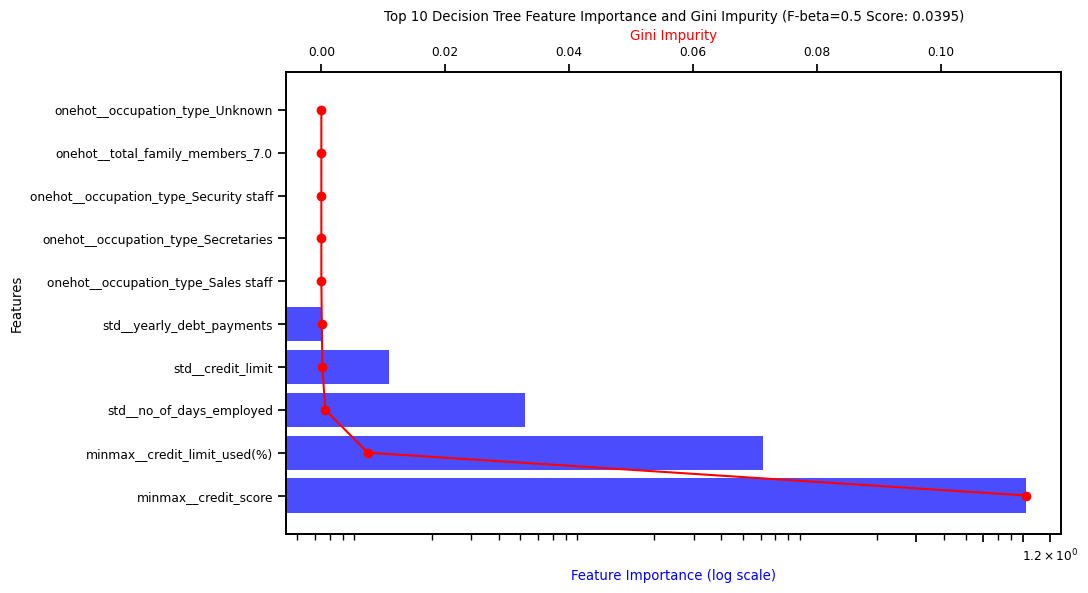

In [43]:
from sklearn.tree import plot_tree

# Make predictions on the test set
y_pred = best_model2.predict(X_test2)

# Evaluate the f-beta score
beta = 0.5
fbeta = fbeta_score(y_test2, y_pred, beta=beta)

# Extract feature importances from the trained decision tree model
feature_importances = best_model2.steps[1][1].feature_importances_

# Compute Gini impurity-based feature importances directly from the tree
gini_importance = best_model2.steps[1][1].tree_.compute_feature_importances(normalize=False)

# Assuming X_test2.columns contains the feature names
feature_names =X_test2_proprocessed.columns.tolist()

# Combine feature names, importances, and Gini impurity into a DataFrame for easy plotting
data = {'Feature': feature_names, 'Importance': feature_importances, 'Gini Impurity': gini_importance}
df = pd.DataFrame(data)

# Sort DataFrame by Gini impurity in descending order
df = df.sort_values(by='Gini Impurity', ascending=False)

# Select the top 10 features
df_top10 = df.head(10)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Horizontal bar plot for feature importance with custom tick formatting
ax1.barh(df_top10['Feature'], df_top10['Importance'], alpha=0.7, color='b', log=True, label='Feature Importance')

# Line plot for Gini impurity
ax2 = ax1.twiny()
ax2.plot(df_top10['Gini Impurity'], df_top10['Feature'], color='r', marker='o', label='Gini Impurity')

# Set labels and title
ax1.set_ylabel('Features')
ax1.set_xlabel('Feature Importance (log scale)', color='b')

# Customize x-axis ticks to be more readable
ax1.set_xscale('log')
ax1.xaxis.set_major_locator(plt.MaxNLocator(nbins=5))  # Adjust the number of ticks as needed

ax2.set_xlabel('Gini Impurity', color='r')
plt.title(f'Top 10 Decision Tree Feature Importance and Gini Impurity (F-beta={beta:.1f} Score: {fbeta:.4f})')

# Save the figure to the desktop
file_path = '/Users/emmasun/Desktop/final/figures/'
# Set DPI
dpi = 350
plt.savefig(file_path + 'op 10 Decision Tree Feature Importance and Gini Impurity.png')

# Show the plot
plt.show()

# 4.Results_Global_SHAP Value

In [49]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [50]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


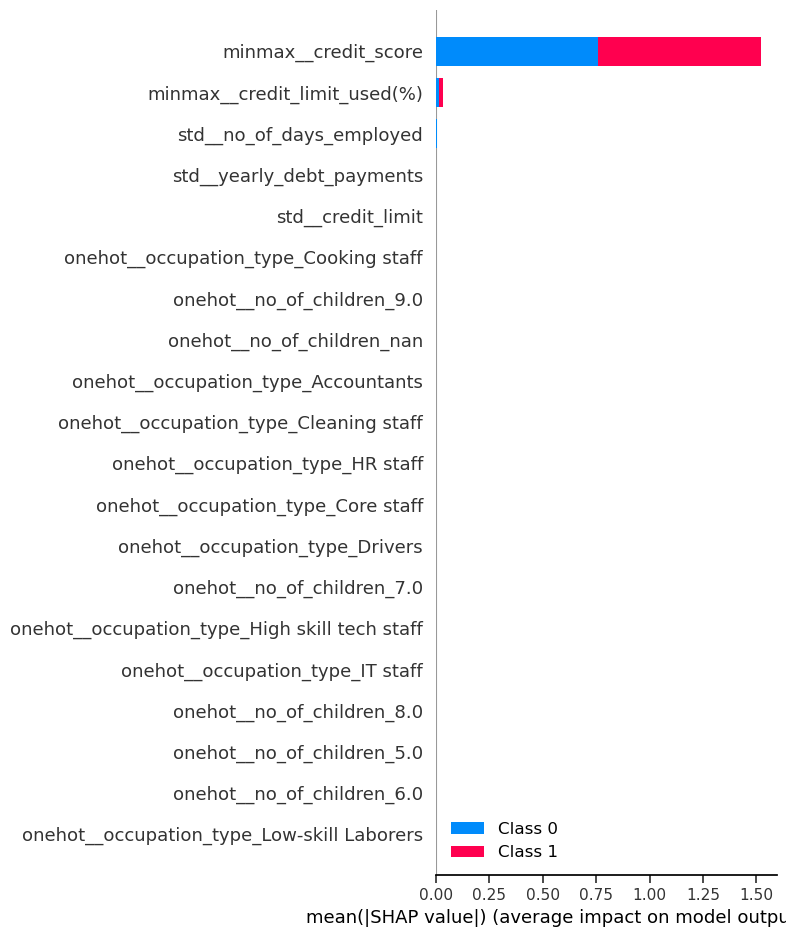

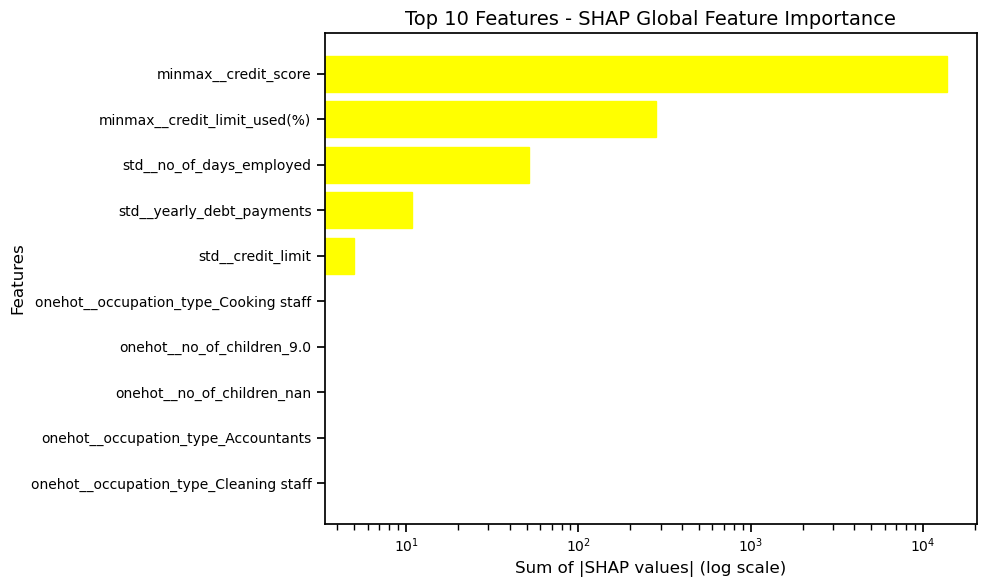

In [59]:
shap.initjs()

# Create a SHAP TreeExplainer for the best_model2
explainer = shap.TreeExplainer(best_model2.steps[1][1])

# Calculate the SHAP values of the test set points
shap_values = explainer.shap_values(X_test2_proprocessed)

# Use the SHAP values to calculate global feature importance values
shap_summary = np.sum(np.abs(shap_values), axis=0)

# Display the summary plot with the top 10 features
shap.summary_plot(shap_values, X_test2_proprocessed, show=True)

# Calculate the sum of absolute SHAP values for both classes
shap_summary_combined = np.sum(np.abs(shap_values[0]), axis=0) + np.sum(np.abs(shap_values[1]), axis=0)

# Combine feature names, importance values, and sort them
feature_names = X_test2_proprocessed.columns
indcs = np.argsort(shap_summary_combined)

# Visualize the top 10 features with a horizontal bar plot and logarithmic scale
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = plt.barh(feature_names[indcs[-10:]], shap_summary_combined[indcs[-10:]], log=True, color='orange')  # Set logarithmic scale for better visualization

# Rotate x-axis ticks for better readability
plt.yticks(rotation=0)

# Customize the number of ticks and fontsize
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add labels to the y-axis ticks
plt.ylabel('Features', fontsize=12)

# Set the bar color to yellow
for bar in bars:
    bar.set_color('yellow')

plt.xlabel('Sum of |SHAP values| (log scale)', fontsize=12)
plt.title('Top 10 Features - SHAP Global Feature Importance', fontsize=14)
plt.tight_layout()  # Ensure tight layout to prevent clipping labels
plt.show()

# 4.Results_Local_SHAP Value

index: 1000


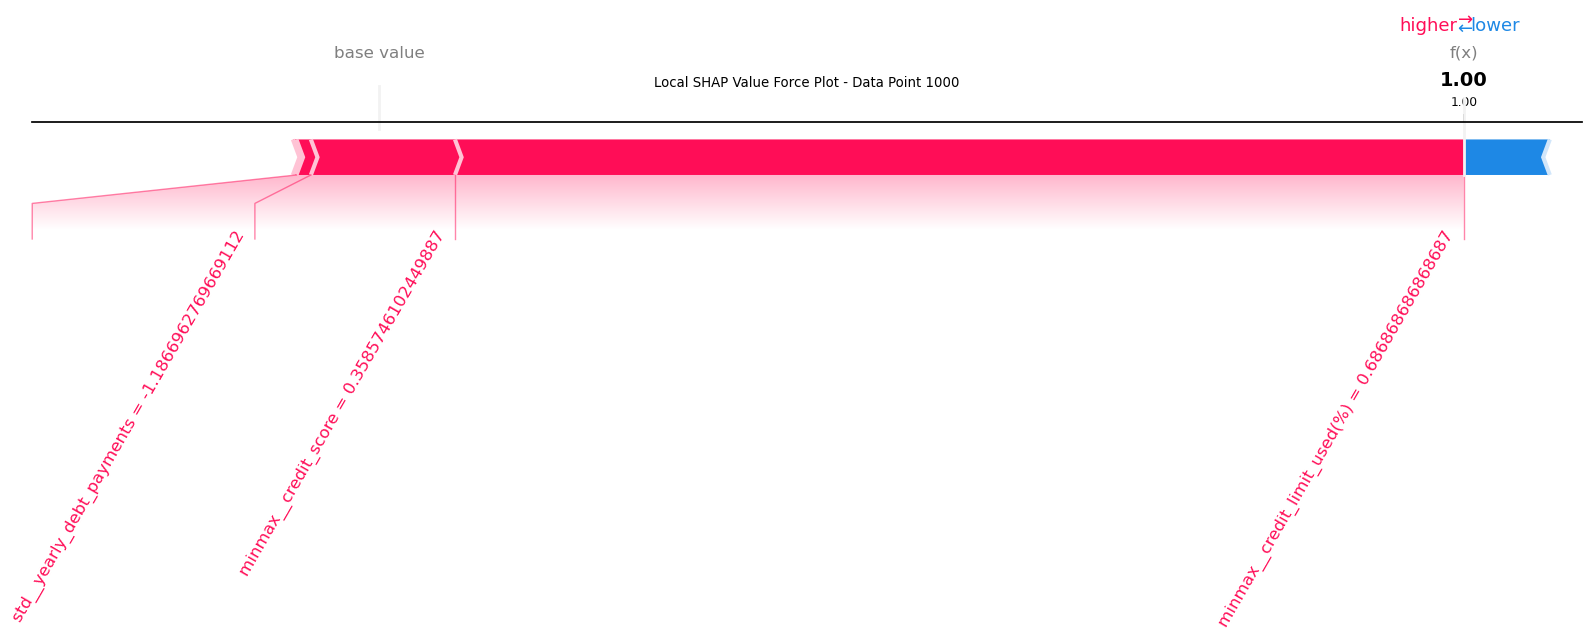

index: 5000


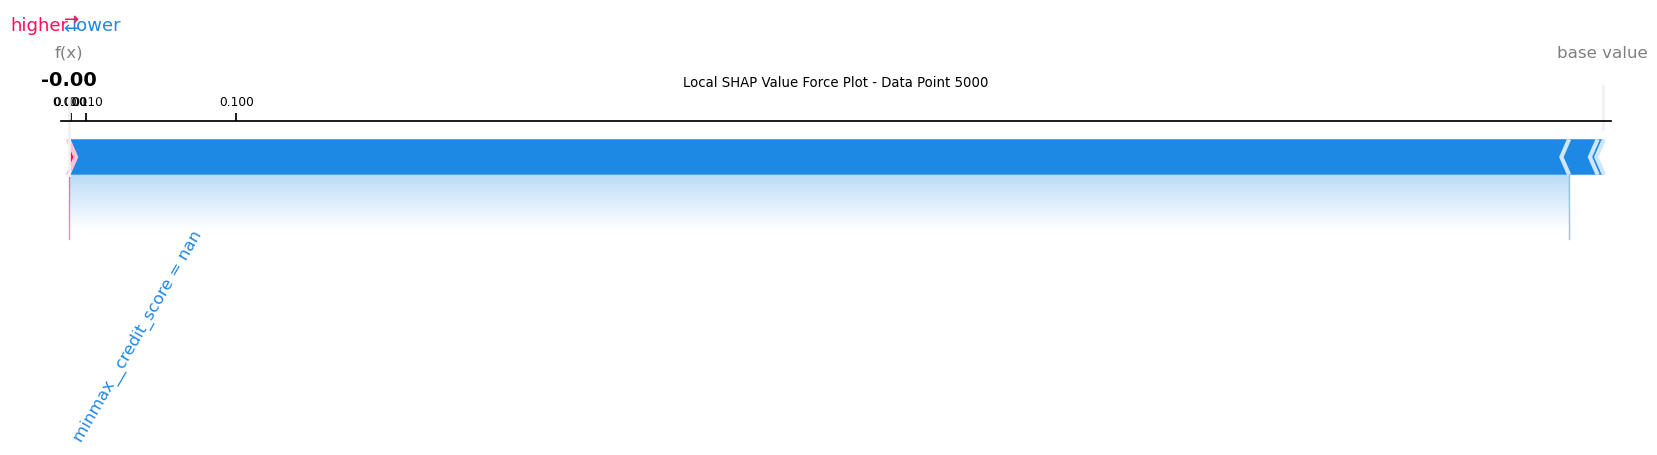

index: 9000


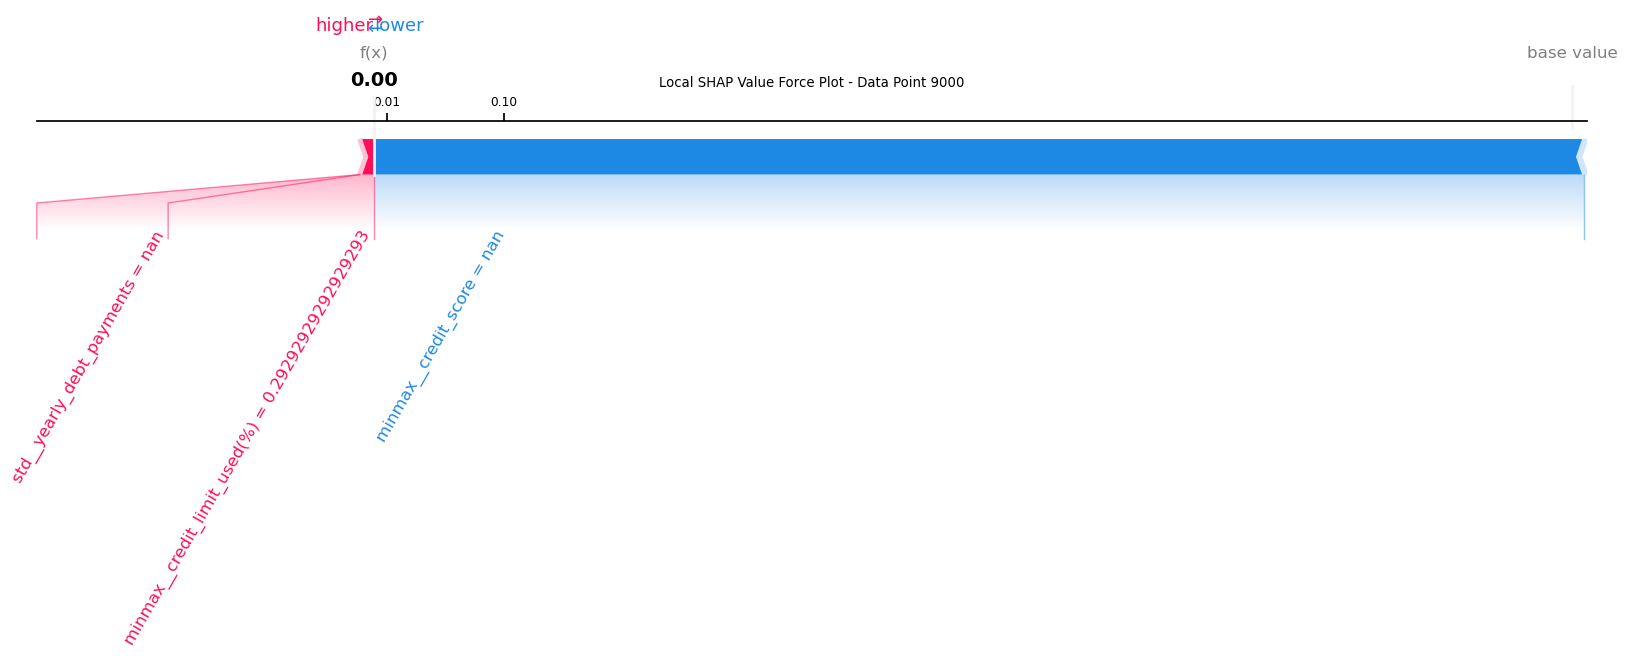

In [57]:
import os

index_points = [1000, 5000, 9000]

# Create a directory to save figures if it doesn't exist
file_path = '/Users/emmasun/Desktop/final/figures/'
os.makedirs(file_path, exist_ok=True)

# Create force plots for the specified data points
for index in index_points:
    print(f'index: {index}')
    
    force_plot = shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values[0][index, :], 
    features=X_test2_proprocessed.iloc[index, :], 
    feature_names=X_test2_proprocessed.columns,
    matplotlib=True,
    text_rotation=60,  # Adjust the angle for text inclination
    show=False
)
    
    # Adjust the scale for readability using a logarithmic scale
    plt.gca().xaxis.set_major_locator(plt.LogLocator(numticks=100))
    
    # Add a title to the force plot
    plt.title(f"Local SHAP Value Force Plot - Data Point {index}")
    
    # Save the figure for each data point
    plt.savefig(file_path + f'Local_SHAP_Value_Force_Plot_{index}.png', dpi=350)
    plt.show()